In [51]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

image_15


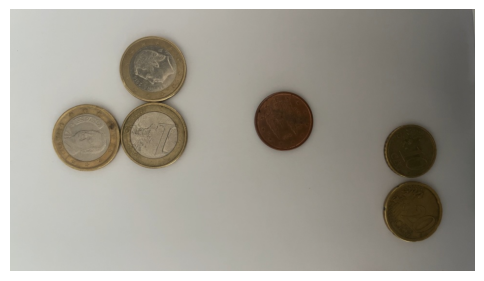

In [52]:
img_files = glob('00_data/*jpg')

img_num = 0
img_n = os.path.basename(img_files[img_num]).split('.')[0]
print(img_n)

img = cv2.imread(f'00_data/{img_n}.jpg')

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

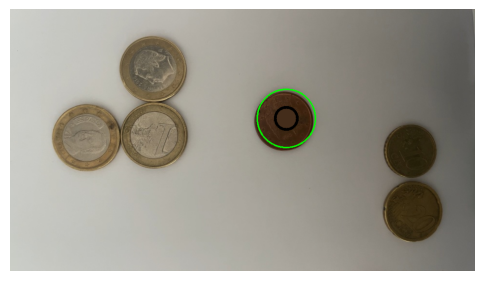

In [53]:
def visualizar_color(color, formato='RGB'):
    """
    Visualiza el color dado en el formato especificado.
    
    Args:
        color (tuple): Tupla con los valores de color.
        formato (str): Formato de color ('RGB' o 'BGR'). Por defecto es 'RGB'.
    """
    color = tuple(int(x) for x in mean_color)

    if formato == 'BGR':
        # Convertir BGR a RGB
        color_01 = (color[2] / 255, color[1] / 255, color[0] / 255)
    elif formato == 'RGB':
        color_01 = (color[0] / 255, color[1] / 255, color[2] / 255)
    else:
        raise ValueError("Formato no reconocido. Usa 'RGB' o 'BGR'.")

    fig, ax = plt.subplots(figsize=(2, 2))
    ax.set_facecolor(color_01)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Color: {color} | {formato}', fontsize=10)
    plt.show()


def get_color_from_circle(img, center, radius, vis= False):
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    cv2.circle(mask, center, radius, 255, -1)
    masked_image = cv2.bitwise_and(img, img, mask=mask)
    mean_color = cv2.mean(masked_image, mask=mask)
    mean_color = tuple(int(x) for x in mean_color)[:3]
    if vis:
        f, ax = plt.subplots(figsize=(6, 6))
        cv2.circle(img, center, radius, (0, 255, 0), 2)  # Color verde para el círculo, grosor 2
        cv2.circle(img, center, 20, (0, 0, 0), 10)
        cv2.circle(img, center, 20, (mean_color[0], mean_color[1], mean_color[2]), -1)
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
        plt.show()
    return mean_color

img = cv2.imread(f'00_data/{img_n}.jpg')
color = get_color_from_circle(img, (570, 225), 60, True)